Nama Kelompok:
1. Achmad Salim Aiman - 1301184045
2. Jayana Citra Agung Pramu Putra - 1301184481

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as plt

In [ ]:
path = 'https://raw.githubusercontent.com/salimaiman/datascience/main/tweetx.csv'
tweets = pd.read_csv(path)
tweets

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1455342063046823939,1455342063046823939,2021-11-02 09:12:41 Malay Peninsula Standard Time,2021-11-02,09:12:41,800,861999830,matthewgellert,Matthew Gellert,NaN,They really need to put the portals appearing ...,en,"[{'screen_name': 'capthlr', 'name': 'captain l...",[],[],0,0,0,"['avengersendgame', 'belowdeck']",[],https://twitter.com/MatthewGellert/status/1455...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1455336926479884292,1455336926479884292,2021-11-02 08:52:16 Malay Peninsula Standard Time,2021-11-02,08:52:16,800,1372299168924856321,game_m0nster,Game-Monster,NaN,#KevinFeige tenía en mente que 6 Vengadores mu...,es,[],['https://www.game-monster.com/streaming/aveng...,[],0,0,0,"['kevinfeige', 'avengersendgame']",[],https://twitter.com/GAME_M0NSTER/status/145533...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1455317218103812099,1453865371467984905,2021-11-02 07:33:57 Malay Peninsula Standard Time,2021-11-02,07:33:57,800,854934238075990017,exalted4ever,LOVEXALTED 🌐,NaN,38) @MarvelStudios @Marvel @Avengers @captainm...,en,"[{'screen_name': 'marvelstudios', 'name': 'mar...",[],['https://pbs.twimg.com/media/FDJTSz0XsAE2Jr4....,1,1,0,"['avengersinfinitywar', 'avengersendgame', 'th...",[],https://twitter.com/EXALTED4ever/status/145531...,False,NaN,1,https://pbs.twimg.com/media/FDJTSz0XsAE2Jr4.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1455317052886028290,1455317052886028290,2021-11-02 07:33:18 Malay Peninsula Standard Time,2021-11-02,07:33:18,800,1704351223,minhazuddinbd,⚡ㄒ卄ㄖ尺⚡,NaN,An official new #MCU timeline highlights #AntM...,en,[],['https://thedirect.com/article/marvel-ant-man...,['https://pbs.twimg.com/media/FDJIFC6XMAQI0HT....,0,0,0,"['mcu', 'antman', 'antman', 'avengersendgame']",[],https://twitter.com/MinhazUddinBD/status/14553...,False,NaN,1,https://pbs.twimg.com/media/FDJIFC6XMAQI0HT.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1455304884186664967,1455304884186664967,2021-11-02 06:44:57 Malay Peninsula Standard Time,2021-11-02,06:44:57,800,846923375209594880,mcu_direct,MCU - The Direct,NaN,An official new #MCU timeline highlights #AntM...,en,[],['https://thedirect.com/article/marvel-ant-man...,['https://pbs.twimg.com/media/FDJIFC6XMAQI0HT....,5,56,685,"['mcu', 'antman', 'antman', 'avengersendgame']",[],https://twitter.com/MCU_Direct/status/14553048...,False,NaN,1,https://pbs.twimg.com/media/FDJIFC6XMAQI0HT.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,1452063880063094786,1452063880063094786,2021-10-24 08:06:21 Malay Peninsula Standard Time,2021-10-24,08:06:21,800,1339667592445833217,nohanchris,Chris Nohan,NaN,Minhas expectativas pra #SpiderManNoWayHome ac...,pt,[],[],[],0,0,1,"['spidermannowayhome', 'avengersendgame']",[],https://twitter.com/NohanChris/status/14520638...,False,https://twitter.com/LeCinephiles/status/998937...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1917,1452059886523670531,1452059886523670531,2021-10-24 07:50:29 Malay Peninsula Standard Time,2021-10-24,07:50:29,800,254810646,internetfount,Internet Fount,NaN,Want to see #AvengersEndgame without #CaptainM...,en,[],['https://www.youtube.com/watch?v=BToVBimyKrg'],[],0,0,0,"['avengersendgame', 'captainmarvel', 'mcu', 'm...",[],https://twitter.com/InternetFount/status/14520...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1918,1452040835898515462,1452040835898515462,2021-10-24 06:34:47 Malay Peninsula Standard Time,2021-10-24,06:34:47,800,954146382,teamdowney1965,Didem,NaN,New images never seen before from the set of #...,en,[],[],['http

In [ ]:
tweets[tweets.duplicated()]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
513,1455342063046823939,1455342063046823939,2021-11-02 09:12:41 Malay Peninsula Standard Time,2021-11-02,09:12:41,800,861999830,matthewgellert,Matthew Gellert,NaN,They really need to put the portals appearing ...,en,"[{'screen_name': 'capthlr', 'name': 'captain l...",[],[],0,0,0,"['avengersendgame', 'belowdeck']",[],https://twitter.com/MatthewGellert/status/1455...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
514,1455336926479884292,1455336926479884292,2021-11-02 08:52:16 Malay Peninsula Standard Time,2021-11-02,08:52:16,800,1372299168924856321,game_m0nster,Game-Monster,NaN,#KevinFeige tenía en mente que 6 Vengadores mu...,es,[],['https://www.game-monster.com/streaming/aveng...,[],0,0,0,"['kevinfeige', 'avengersendgame']",[],https://twitter.com/GAME_M0NSTER/status/145533...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
515,1455317218103812099,1453865371467984905,2021-11-02 07:33:57 Malay Peninsula Standard Time,2021-11-02,07:33:57,800,854934238075990017,exalted4ever,LOVEXALTED 🌐,NaN,38) @MarvelStudios @Marvel @Avengers @captainm...,en,"[{'screen_name': 'marvelstudios', 'name': 'mar...",[],['https://pbs.twimg.com/media/FDJTSz0XsAE2Jr4....,1,1,0,"['avengersinfinitywar', 'avengersendgame', 'th...",[],https://twitter.com/EXALTED4ever/status/145531...,False,NaN,1,https://pbs.twimg.com/media/FDJTSz0XsAE2Jr4.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
516,1455317052886028290,1455317052886028290,2021-11-02 07:33:18 Malay Peninsula Standard Time,2021-11-02,07:33:18,800,1704351223,minhazuddinbd,⚡ㄒ卄ㄖ尺⚡,NaN,An official new #MCU timeline highlights #AntM...,en,[],['https://thedirect.com/article/marvel-ant-man...,['https://pbs.twimg.com/media/FDJIFC6XMAQI0HT....,0,0,0,"['mcu', 'antman', 'antman', 'avengersendgame']",[],https://twitter.com/MinhazUddinBD/status/14553...,False,NaN,1,https://pbs.twimg.com/media/FDJIFC6XMAQI0HT.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
518,1455301191731187716,1455301191731187716,2021-11-02 06:30:16 Malay Peninsula Standard Time,2021-11-02,06:30:16,800,1289825357022068736,ilonayarofiiuk,Ilonka,NaN,Tony meets Natasha after the final and then Vi...,en,"[{'screen_name': 'avengers', 'name': 'avengers...",[],[],0,0,0,"['marvel', 'marvelstudios', 'avengersendgame',...",[],https://twitter.com/ilonayarofiiuk/status/1455...,False,NaN,1,https://pbs.twimg.com/ext_tw_video_thumb/14553...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,1452063880063094786,1452063880063094786,2021-10-24 08:06:21 Malay Peninsula Standard Time,2021-10-24,08:06:21,800,1339667592445833217,nohanchris,Chris Nohan,NaN,Minhas expectativas pra #SpiderManNoWayHome ac...,pt,[],[],[],0,0,1,"['spidermannowayhome', 'avengersendgame']",[],https://twitter.com/NohanChris/status/14520638...,False,https://twitter.com/LeCinephiles/status/998937...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1917,1452059886523670531,1452059886523670531,2021-10-24 07:50:29 Malay Peninsula Standard Time,2021-10-24,07:50:29,800,254810646,internetfount,Internet Fount,NaN,Want to see #AvengersEndgame without #CaptainM...,en,[],['https://www.youtube.com/watch?v=BToVBimyKrg'],[],0,0,0,"['avengersendgame', 'captainmarvel', 'mcu', 'm...",[],https://twitter.com/InternetFount/status/14520...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1918,1452040835898515462,1452040835898515462,2021-10-24 06:34:47 Malay Peninsula Standard Time,2021-10-24,06:34:47,800,954146382,teamdowney1965,Didem,NaN,New images never seen before from the set of #...,en,[],[],['https://pbs.twimg.com/media/FCavb8-XoAAxrw

In [ ]:
tweets.drop_duplicates(inplace=True)
tweets[tweets.duplicated()]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest


In [ ]:
tweets1=tweets[tweets['mentions'] !='[]']
tweets1['mentions']=tweets1['mentions'].str[1:]
a=(tweets1.assign(list=tweets1["mentions"].str.split(", ")).explode("list"))

c=a[a.list.str.contains("'screen")]

c['list']=c['list'].str[17:]
c['list']=c['list'].str[:-1]
print(c.head())
c.to_csv(r'artru.csv')

                    id      conversation_id  ... trans_dest           list
0  1455342063046823939  1455342063046823939  ...        NaN        capthlr
2  1455317218103812099  1453865371467984905  ...        NaN  marvelstudios
2  1455317218103812099  1453865371467984905  ...        NaN         marvel
2  1455317218103812099  1453865371467984905  ...        NaN       avengers
2  1455317218103812099  1453865371467984905  ...        NaN  captainmarvel

[5 rows x 37 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
tweets2=tweets[tweets['reply_to'] !='[]']
tweets2['reply_to']=tweets2['reply_to'].str[1:]
a2=(tweets2.assign(list=tweets2["reply_to"].str.split(", ")).explode("list"))

c2=a2[a2.list.str.contains("'screen")]

c2['list']=c2['list'].str[17:]
c2['list']=c2['list'].str[:-1]
print(c2.head())
c2.to_csv(r'artru2.csv')

                     id      conversation_id  ... trans_dest            list
44  1455087459742613512  1455017367050858506  ...        NaN      CEvansNews
56  1454956495863435265  1454943364764209155  ...        NaN   robertliefeld
58  1454922718265159686  1453763755209203713  ...        NaN      VenomMovie
59  1454922538933538816  1454493626239619073  ...        NaN      VenomMovie
59  1454922538933538816  1454493626239619073  ...        NaN  SpiderManMovie

[5 rows x 37 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
G=nx.from_pandas_edgelist(c,source='username', target='list', create_using=nx.DiGraph())
ec = nx.eigenvector_centrality(G, tol=1e-03)
sc1 = sorted(ec.items(), key=lambda x: x[1], reverse=True)

In [ ]:
G2=nx.from_pandas_edgelist(c2,source='username', target='list', create_using=nx.DiGraph())
ec2 = nx.eigenvector_centrality(G2, tol=1e-03)
sc2 = sorted(ec2.items(), key=lambda x: x[1], reverse=True)

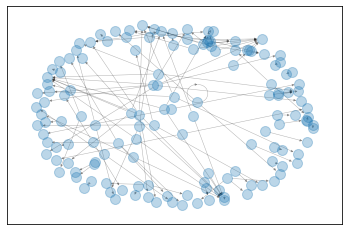

In [ ]:
nx.draw_networkx(G, with_labels=False, node_size=100, arrowsize=5, alpha=0.3, width=0.5)

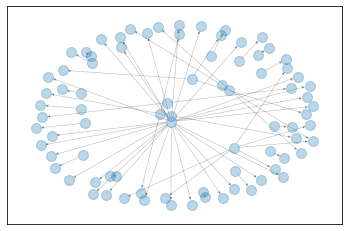

In [ ]:
nx.draw_networkx(G2, with_labels=False, node_size=100, arrowsize=5, alpha=0.3, width=0.5)

In [ ]:
print("10 influential users dalam penyebaran informasi tentang Avengers End Game adalah:\n\nEigenvector Centrality:\n")
sc1[:10]

10 influential users dalam penyebaran informasi tentang Avengers End Game adalah:

Eigenvector Centrality:



[('toonworldforall', 0.5772570002431344),
 ('gaur_brothers', 0.5772570002431344),
 ('mohitgaur_17', 0.5772570002431344),
 ('marvelstudios', 0.008314981204674053),
 ('chrisevans', 0.006482866701949264),
 ('robertdowneyjr', 0.006482866701949264),
 ('marvel', 0.005566809450586868),
 ('youtube', 0.004650752199224472),
 ('avengers', 0.0037346949478620764),
 ('chrishemsworth', 0.0037346949478620764)]

In [ ]:
print("10 influential users dalam penyebaran informasi tentang Avengers End Game adalah:\n\nEigenvector Centrality:\n")
sc2[:10]

10 influential users dalam penyebaran informasi tentang Avengers End Game adalah:

Eigenvector Centrality:



[('SpiderManMovie', 0.23601280369276909),
 ('CEvansNews', 0.1270838173730295),
 ('robertliefeld', 0.1270838173730295),
 ('VenomMovie', 0.1270838173730295),
 ('Marvel', 0.1270838173730295),
 ('chrishemsworth', 0.1270838173730295),
 ('CentrFit', 0.1270838173730295),
 ('RobertDowneyJr', 0.1270838173730295),
 ('Aspiration', 0.1270838173730295),
 ('Variety', 0.1270838173730295)]